In [1]:
import pandas as pd

birddata = pd.read_csv('bird_tracking.csv')
birddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 8 columns):
altitude              61920 non-null int64
date_time             61920 non-null object
device_info_serial    61920 non-null int64
direction             61477 non-null float64
latitude              61920 non-null float64
longitude             61920 non-null float64
speed_2d              61477 non-null float64
bird_name             61920 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 3.8+ MB


In [2]:
birddata.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

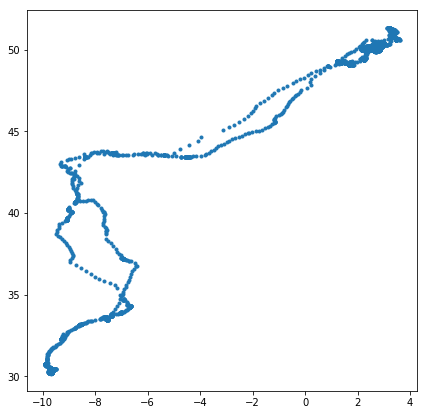

In [4]:
ix = birddata['bird_name'] == "Eric"
x,y = birddata['longitude'][ix], birddata['latitude'][ix]

plt.figure(figsize=(7,7))
plt.plot(x,y, '.');

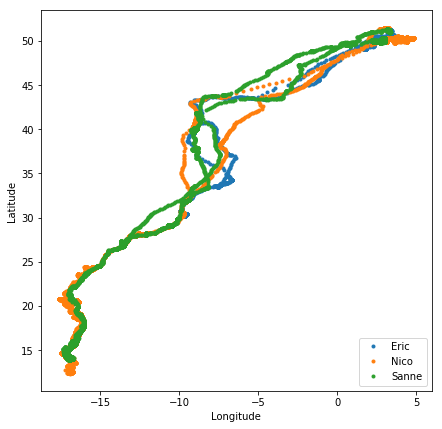

In [7]:
bird_names = birddata['bird_name'].unique() #extract GPS data for each individual bird

plt.figure(figsize=(7,7))

for bird in bird_names:
	ix = birddata['bird_name'] == bird
	x,y = birddata['longitude'][ix], birddata['latitude'][ix]
	plt.plot(x,y, '.', label=bird)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='lower right');

85
True


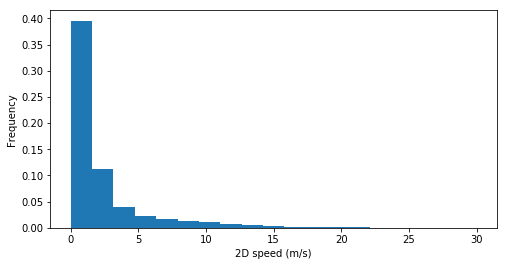

In [8]:
#examining flight speed (2D)
ix = birddata['bird_name'] == "Eric"
speed = birddata['speed_2d'][ix]

birddata['speed_2d'][ix].isnull().sum()
print(sum(np.isnan(speed)))
print(np.isnan(speed).any())

ind = np.isnan(speed)

plt.figure(figsize=(8,4))
plt.hist(speed[~ind], bins=np.linspace(0, 30, 20), density=True)
plt.xlabel('2D speed (m/s)')
plt.ylabel('Frequency');

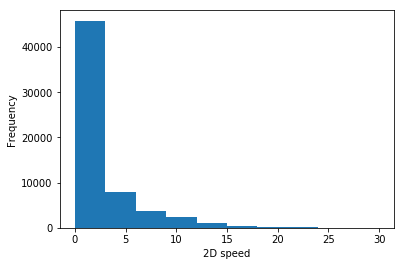

In [9]:
# same using pandas
birddata['speed_2d'].plot(kind='hist', range=[0, 30])
	# NaN are auomatically excluded from the visualization analysis
plt.xlabel('2D speed');

In [14]:
#using datatime
birddata.columns

print(birddata['date_time'][:3])
	#c obj (str) annot be used for arithmetic operiations --> conversion

import datetime

timestamps = []
for k in range(len(birddata)):
	timestamps.append(datetime.datetime.strptime(birddata.iloc[k][
			'date_time'][:-3], "%Y-%m-%d %H:%M:%S"))

0    2013-08-15 00:18:08+00
1    2013-08-15 00:48:07+00
2    2013-08-15 01:17:58+00
Name: date_time, dtype: object


In [15]:
print(timestamps[:5])

[datetime.datetime(2013, 8, 15, 0, 18, 8), datetime.datetime(2013, 8, 15, 0, 48, 7), datetime.datetime(2013, 8, 15, 1, 17, 58), datetime.datetime(2013, 8, 15, 1, 47, 51), datetime.datetime(2013, 8, 15, 2, 17, 42)]


In [16]:
# insert the list into the df
birddata['timestamp'] = pd.Series(timestamps, index=birddata.index)
	#match the index

birddata.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419859,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42


In [18]:
#elapsed time
times=birddata['timestamp'][birddata['bird_name'] == 'Eric']
elapsed_time = [time - times[0] for time in times]
elapsed_time[:5]

[Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:29:59'),
 Timedelta('0 days 00:59:50'),
 Timedelta('0 days 01:29:43'),
 Timedelta('0 days 01:59:34')]

In [20]:
#arithmetic computations using specific timedelta
print(elapsed_time[1000] / datetime.timedelta(days=1))
print(elapsed_time[10] / datetime.timedelta(hours=1))

12.084722222222222
3.758611111111111


Text(0, 0.5, 'Elapsed time (days)')

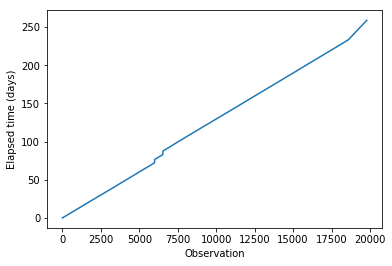

In [21]:
plt.plot(np.array(elapsed_time) / datetime.timedelta(days=1))
plt.xlabel('Observation')
plt.ylabel('Elapsed time (days)')
#plt.savefig('timeplot.pdf')

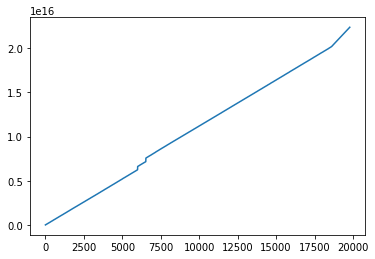

In [24]:
#calculation of timestamp exclusively using pandas
df = pd.read_csv('bird_tracking.csv', parse_dates=[1])

df['timestamp'] = df['date_time'] - df['date_time'][0]
df['timestamp'][df['bird_name']=='Eric'].plot();
#-----------

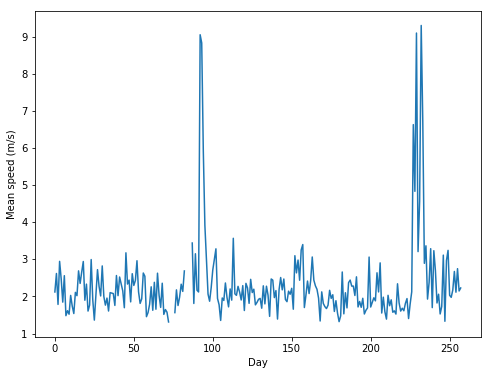

In [26]:
#calculating daily mean speed
next_day = 1
inds = []
daily_mean_speed = []

data = birddata[birddata['bird_name'] == 'Eric']
elapsed_days = np.array(elapsed_time) / datetime.timedelta(days=1)

for i, t in enumerate(elapsed_days):
	if t < next_day:
		inds.append(i)
	else:
		daily_mean_speed.append(np.mean(data['speed_2d'][inds]))
		next_day += 1
		inds = []

plt.figure(figsize=(8,6))
plt.plot(daily_mean_speed)
plt.xlabel('Day')
plt.ylabel('Mean speed (m/s)');
# the pics correspond to migration!

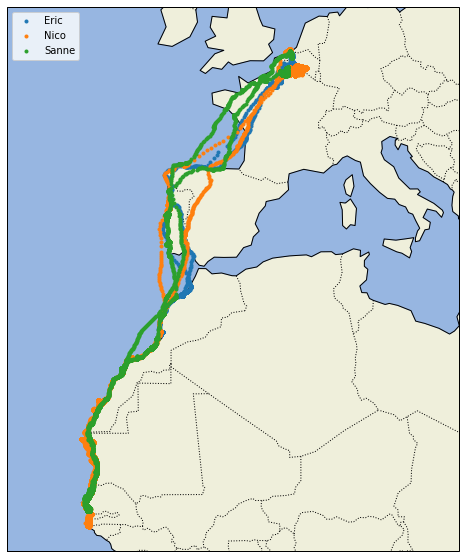

In [27]:
#using Cartopy
# install prebuilt wheel (incl Shapely) from www.lfd.uci.edu/

import cartopy.crs as ccrs
import cartopy.feature as cfeature

proj = ccrs.Mercator()

plt.figure(figsize=(10,10))
ax = plt.axes(projection=proj)
ax.set_extent((-25, 20, 52, 10))

#features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

for name in bird_names:
	ix = birddata['bird_name'] == name
	x,y = birddata['longitude'][ix], birddata['latitude'][ix]
	ax.plot(x,y, '.', transform=ccrs.Geodetic(), label=name)

plt.legend(loc='upper left');